# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace=True)

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [6]:
for col in heroes_df.columns:
    print(f'{col}:', heroes_df[col].unique())
#NaN values seem to be denoted with '-'

name: ['A-Bomb' 'Abe Sapien' 'Abin Sur' 'Abomination' 'Abraxas' 'Absorbing Man'
 'Adam Monroe' 'Adam Strange' 'Agent 13' 'Agent Bob' 'Agent Zero'
 'Air-Walker' 'Ajax' 'Alan Scott' 'Alex Mercer' 'Alex Woolsly'
 'Alfred Pennyworth' 'Alien' 'Allan Quatermain' 'Amazo' 'Ammo'
 'Ando Masahashi' 'Angel' 'Angel Dust' 'Angel Salvadore' 'Angela'
 'Animal Man' 'Annihilus' 'Ant-Man' 'Ant-Man II' 'Anti-Monitor'
 'Anti-Spawn' 'Anti-Venom' 'Apocalypse' 'Aquababy' 'Aqualad' 'Aquaman'
 'Arachne' 'Archangel' 'Arclight' 'Ardina' 'Ares' 'Ariel' 'Armor'
 'Arsenal' 'Astro Boy' 'Atlas' 'Atom' 'Atom Girl' 'Atom II' 'Atom III'
 'Atom IV' 'Aurora' 'Azazel' 'Azrael' 'Aztar' 'Bane' 'Banshee' 'Bantam'
 'Batgirl' 'Batgirl III' 'Batgirl IV' 'Batgirl V' 'Batgirl VI' 'Batman'
 'Batman II' 'Battlestar' 'Batwoman V' 'Beak' 'Beast' 'Beast Boy' 'Beetle'
 'Ben 10' 'Beta Ray Bill' 'Beyonder' 'Big Barda' 'Big Daddy' 'Big Man'
 'Bill Harken' 'Billy Kincaid' 'Binary' 'Bionic Woman' 'Bird-Brain'
 'Bird-Man' 'Bird-Man II' 'Birdm

In [7]:
for col in heroes_df.columns:
    print(f'{col}:', heroes_df[col].value_counts())

name: Goliath         3
Spider-Man      3
Batgirl         2
Vindicator      2
Batman          2
               ..
Batgirl IV      1
Batgirl III     1
Taskmaster      1
Supergirl       1
Captain Cold    1
Name: name, Length: 715, dtype: int64
Gender: Male      505
Female    200
-          29
Name: Gender, dtype: int64
Eye color: blue                       225
-                          172
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
violet                       2
yellow (without irises)      2
amber                        2
white / red                  1
indigo                       1
yellow / red                 1
silver                       1
green / blue                 1
bown                         1
blue / white       

In [8]:
heroes_df.describe()
#-99 looks like another NaN value

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


## powers_df

In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
powers_df.dtypes

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

In [11]:
powers_df.hero_names.value_counts().max()

1

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




    First I will check for duplicates in both DataFrames

In [12]:
heroes_df[heroes_df.duplicated()]


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


    Looks like there is only one duplicate row.  We should drop it.

In [13]:
heroes_df.drop_duplicates(inplace = True)
heroes_df[heroes_df.duplicated()]


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


In [14]:
powers_df[powers_df.duplicated()]


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [15]:
powers_df['hero_names'][powers_df['hero_names'].duplicated()]

Series([], Name: hero_names, dtype: object)

    Great no duplicates in the powers_df

    The above data exploration revieled that '-' is used in place of NaN throughout the dataframe for missing categorical data.  First I will replace those values with np.NaN to make further decisions easier.

In [16]:
heroes_df.replace('-', np.nan, inplace=True)

    I also descovered that -99 is used as a placeholder value for numerical columns.  We know this because -99 is not a valid height or weight.

In [17]:
heroes_df.replace(-99, np.nan, inplace=True)

In [18]:
heroes_df.describe()
# Thats better

,Height,Weight
count,517.000000,495.000000
mean,186.726306,112.252525
std,59.251895,104.151142
min,15.200000,2.000000
25%,173.000000,61.000000
50%,183.000000,81.000000
75%,191.000000,108.000000
max,975.000000,900.000000


    looking for anythign else I might have missed.

In [19]:
for cols in heroes_df.columns:
    if heroes_df[cols].dtype == 'object':
        print(heroes_df[cols].value_counts(), '\n\n')

Spider-Man      3
Batgirl         2
Vindicator      2
Batman          2
Atlas           2
               ..
Batgirl IV      1
Batgirl III     1
Taskmaster      1
Supergirl       1
Captain Cold    1
Name: name, Length: 715, dtype: int64 


Male      504
Female    200
Name: Gender, dtype: int64 


blue                       225
brown                      126
green                       73
red                         46
black                       23
yellow                      19
white                       17
hazel                        6
grey                         6
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
indigo                       1
yellow / blue                1
white / red                  1
silver                       1
green / blue                 1
bown                         1
blue / white                 1
yellow / red                 1
Name: Eye color, dtyp

    Why are there 3 Spider-Man's?

In [20]:
heroes_df[heroes_df['name'] == 'Spider-Man']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
622,Spider-Man,Male,hazel,Human,Brown,178.0,Marvel Comics,NaN,good,74.0
623,Spider-Man,NaN,red,Human,Brown,178.0,Marvel Comics,NaN,good,77.0
624,Spider-Man,Male,brown,Human,Black,157.0,Marvel Comics,NaN,good,56.0


    Wow.  So they are not duplicates but we found that we could infer that the gender for 623 is Male. I think I will leave this for another day.  First, do I really *know* that thats not a woman Spider-Man?  Probably best to stick to the data here.

    Now I will decide what to do with the NaN values on a colum by column basis.

In [21]:
heroes_df.isna().sum()
# That is a lot of missing information

name            0
Gender         29
Eye color     171
Race          304
Hair color    171
Height        216
Publisher      15
Skin color    661
Alignment       7
Weight        238
dtype: int64

In [22]:
#Get percentage of data missing for each column
(heroes_df.isna().sum() / heroes_df.size).sort_values()

name          0.000000
Alignment     0.000955
Publisher     0.002046
Gender        0.003956
Eye color     0.023329
Hair color    0.023329
Height        0.029468
Weight        0.032469
Race          0.041473
Skin color    0.090177
dtype: float64

    First I think it makes sense to deal with the columns that have a large percentage of NaN values.  The columns with the largest number of NaN values are 'Skin Color' and 'Race'.  Interpolating these seems like it would product algorhthmic bias.  They should just be dropped.

In [23]:
heroes_df.drop(['Race', 'Skin color'], axis = 1, inplace = True)

In [24]:
#Get percentage of data missing for each column
(heroes_df.isna().sum() / heroes_df.size).sort_values()

name          0.000000
Alignment     0.001194
Publisher     0.002558
Gender        0.004945
Eye color     0.029161
Hair color    0.029161
Height        0.036835
Weight        0.040587
dtype: float64

    Lets see whether mean or median does a better job on for mantianing the distribution of Height and Weight.

In [25]:
heroes_df['Height'].describe()

count    517.000000
mean     186.726306
std       59.251895
min       15.200000
25%      173.000000
50%      183.000000
75%      191.000000
max      975.000000
Name: Height, dtype: float64

In [26]:
#filled with mean
heroes_df['Height'].fillna(heroes_df['Height'].mean()).describe()

count    733.000000
mean     186.726306
std       49.747533
min       15.200000
25%      178.000000
50%      186.726306
75%      186.726306
max      975.000000
Name: Height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

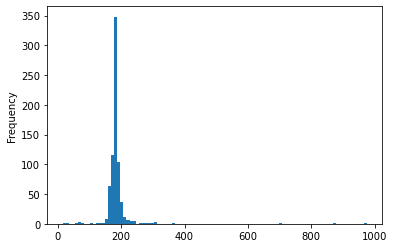

In [27]:
heroes_df['Height'].fillna(heroes_df['Height'].mean()).plot.hist(bins=100)

    Wow, we have signifigant outliers.  Must check that to see if the results are valid.  What are the Height units anyway?  According to kaggle this is height in cm.  So the talles is 9.75m tall.  Well they are super heroes so lets see who that is.

In [28]:
heroes_df[heroes_df['Height'] == 975]

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
255,Fin Fang Foom,Male,red,No Hair,975.0,Marvel Comics,good,18.0


    Well Google says 255 ft or 777.7 m.  Still huge.  Lets keep the outliers.
    
    Wait, but he he only ways 18kg???  Google says 20 Tons.
    
    It seems likely that we need to remove the outliers that really don't make sense.

In [29]:
#Find outliers beyond 3 std deviations.
height_outliers = heroes_df[np.abs(heroes_df['Height']-heroes_df['Height'].mean()) > (3*heroes_df['Height'].std())]
height_outliers

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
255,Fin Fang Foom,Male,red,No Hair,975.0,Marvel Comics,good,18.0
272,Galactus,Male,black,Black,876.0,Marvel Comics,neutral,16.0
302,Groot,Male,yellow,NaN,701.0,Marvel Comics,good,4.0
463,MODOK,Male,white,Brownn,366.0,Marvel Comics,bad,338.0
718,Wolfsbane,Female,green,Auburn,366.0,Marvel Comics,good,473.0


    3 of those look clearly wrong and 2 are probably ok.  What if I only want the ones that are.
    3 * std of Weight is more than the mean so we aren't going to find those small numbers.  Lets 
    try taking 1.5 times the inter quartile range for our outlier detection.

In [30]:
iqr = heroes_df['Weight'].quantile(.75) - heroes_df['Weight'].quantile(.25)
weight_outliers = heroes_df[np.abs(heroes_df['Weight']-heroes_df['Weight'].mean()) > (1.5 * iqr)]
weight_outliers

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
33,Anti-Venom,Male,blue,Blond,229.0,Marvel Comics,NaN,358.0
42,Ares,Male,brown,Brown,185.0,Marvel Comics,good,270.0
78,Beta Ray Bill,Male,NaN,No Hair,201.0,Marvel Comics,good,216.0
...,...,...,...,...,...,...,...,...
691,Venom III,Male,brown,Brown,229.0,Marvel Comics,bad,334.0
698,Violet Parr,Female,violet,Black,137.0,Dark Horse Comics,good,41.0
717,Wiz Kid,NaN,brown,Black,140.0,Marvel Comics,good,39.0
718,Wolfsbane,Female,green,Auburn,366.0,Marvel Comics,good,473.0


In [31]:
#Now find records in both.
weight_outliers.set_index('name')
height_outliers.set_index('name')
# set(weight_outliers['name']).intersection(height_outliers['name'])
# weight_outliers.join(height_outliers['name'], how='inner', suffix='_')
# print(weight_outliers.index)
# print(height_outliers.index)
drop_idx = weight_outliers.index.intersection(height_outliers.index)
heroes_df.loc[drop_idx]

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
255,Fin Fang Foom,Male,red,No Hair,975.0,Marvel Comics,good,18.0
272,Galactus,Male,black,Black,876.0,Marvel Comics,neutral,16.0
302,Groot,Male,yellow,NaN,701.0,Marvel Comics,good,4.0
463,MODOK,Male,white,Brownn,366.0,Marvel Comics,bad,338.0
718,Wolfsbane,Female,green,Auburn,366.0,Marvel Comics,good,473.0


    So really we only want to remove the low weights because the high weights seem ok.

In [32]:
drop_idx = height_outliers[height_outliers['Weight'] < heroes_df['Weight'].mean()]
drop_idx

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
255,Fin Fang Foom,Male,red,No Hair,975.0,Marvel Comics,good,18.0
272,Galactus,Male,black,Black,876.0,Marvel Comics,neutral,16.0
302,Groot,Male,yellow,NaN,701.0,Marvel Comics,good,4.0


    drop em!

In [33]:
new_df = heroes_df.drop(drop_idx.index)
new_df[new_df['name'] == 'Groot']
heroes_df = new_df

In [34]:
#filled with median
heroes_df['Height'].fillna(heroes_df['Height'].median()).describe()

count    730.000000
mean     182.895205
std       24.648414
min       15.200000
25%      178.000000
50%      183.000000
75%      185.000000
max      366.000000
Name: Height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

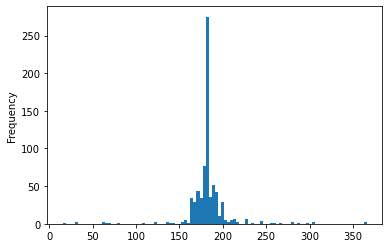

In [35]:
heroes_df['Height'].fillna(heroes_df['Height'].mean()).plot.hist(bins=100)

    There isn't a huge difference in the result either way so we will use the median to keep the std intact and to prevent "Fin Fang Foom skew" :)

In [36]:
heroes_df['Height'].fillna(heroes_df['Height'].median(), inplace = True)

    Now to deal with weight.  Lets do the same comparisons.

In [37]:
heroes_df['Weight'].fillna(heroes_df['Weight'].mean()).describe()

count    730.000000
mean     112.859756
std       85.495388
min        2.000000
25%       74.000000
50%      106.000000
75%      112.859756
max      900.000000
Name: Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

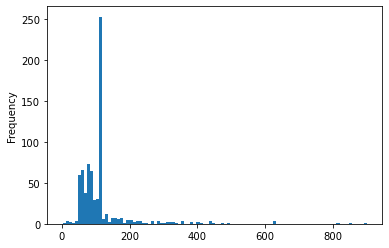

In [38]:
heroes_df['Weight'].fillna(heroes_df['Weight'].mean()).plot.hist(bins=100)

In [39]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median()).describe()

count    730.000000
mean     102.472603
std       86.791742
min        2.000000
25%       74.000000
50%       81.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

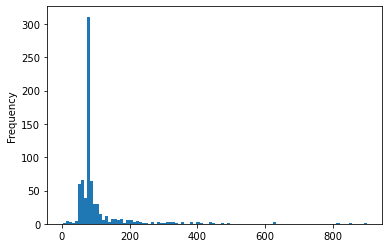

In [40]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median()).plot.hist(bins=100)

    Those both result in big changes.  Again, to prevent the "Fin Fang Foom Skew" we will use median.  We could have eliminated the outliers but then we wouldn't have the data on the HUGE super heroes.

In [41]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace = True)

    Lets see where we are

In [42]:
(heroes_df.isna().sum() / heroes_df.size).sort_values()

name          0.000000
Height        0.000000
Weight        0.000000
Alignment     0.001199
Publisher     0.002568
Gender        0.004966
Hair color    0.029110
Eye color     0.029281
dtype: float64

    Now to deal with Eye color and Hair color.
    
    I'm goign to guess that we should fill with the mode because these are categorical.  Lets seem if that seems reasonable after exploring the number of occurences of each value.

In [43]:
heroes_df['Hair color'].value_counts().sort_values()

Orange / White        1
Brown / Black         1
Gold                  1
Brownn                1
Black / Blue          1
Red / Orange          1
Red / Grey            1
Indigo                1
Pink                  1
Magenta               1
Red / White           1
Orange                2
Yellow                2
Blue                  3
blond                 3
black                 3
Brown / White         4
Silver                4
Grey                  5
Purple                5
Strawberry Blond      7
Green                 8
Auburn               13
White                23
Red                  51
No Hair              74
Brown                86
Blond                99
Black               157
Name: Hair color, dtype: int64

In [44]:
heroes_df['Eye color'].value_counts().sort_values()

yellow / red                 1
bown                         1
green / blue                 1
silver                       1
white / red                  1
yellow / blue                1
indigo                       1
blue / white                 1
violet                       2
yellow (without irises)      2
amber                        2
gold                         3
purple                       4
grey                         6
hazel                        6
white                       17
yellow                      18
black                       22
red                         45
green                       73
brown                      126
blue                       225
Name: Eye color, dtype: int64

    Great.  The mode looks considerably higher than any other values.  Lets fill it!

In [45]:
heroes_df['Hair color'] = heroes_df['Hair color'].fillna('Black') #re place with mode

In [46]:
heroes_df['Eye color'] = heroes_df['Eye color'].fillna('blue')

    What's left?

In [47]:
(heroes_df.isna().sum() / heroes_df.size).sort_values()

name          0.000000
Eye color     0.000000
Hair color    0.000000
Height        0.000000
Weight        0.000000
Alignment     0.001199
Publisher     0.002568
Gender        0.004966
dtype: float64

    Lets see which rows have NaN values for Gender.

In [48]:
heroes_df[heroes_df['Gender'].isna()]

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
87,Bird-Brain,NaN,blue,Black,183.0,Marvel Comics,good,81.0
112,Blaquesmith,NaN,black,No Hair,183.0,Marvel Comics,good,81.0
133,Box III,NaN,blue,Blond,193.0,Marvel Comics,good,110.0
134,Box IV,NaN,brown,Brown / Black,183.0,Marvel Comics,good,81.0
160,Captain Universe,NaN,blue,Black,183.0,Marvel Comics,good,81.0
165,Cecilia Reyes,NaN,brown,Brown,170.0,Marvel Comics,good,62.0
178,Clea,NaN,blue,White,183.0,Marvel Comics,good,81.0
196,Cypher,NaN,blue,Blond,175.0,Marvel Comics,good,68.0
204,Darkside,NaN,blue,Black,183.0,NaN,bad,81.0
234,Ego,NaN,blue,Black,183.0,Marvel Comics,bad,81.0


    Hmm.  Spider-MAN, Man of Miracles, and Machine, Man are on that list.  But then so are Cecilia Reyes and Clea.  This is a small enough percentage of our data that I will drop the rows.  It will take care of some of my NaN publisher rows too.
    
    While I'm at it I will drop NaN publishers and alignment rows.

In [49]:
heroes_df = heroes_df.dropna()

In [50]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

    Phew, this really is 80% of the work.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [51]:
heroes_df.set_index('name', inplace=True)
heroes_df.head()

,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,
A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,Male,blue,Black,183.0,Marvel Comics,bad,81.0


In [52]:
powers_df.set_index('hero_names', inplace=True)
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
heroes_df.index.value_counts().max()

2

In [54]:
powers_df.index.value_counts().max()
# powers_df.columns

1

In [55]:
# since most of the questions below are about powers we are going to join on name in the powers_df which is unique
# for each superhero
hero_powers = heroes_df.join(powers_df, how='right' )

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0.5, 0, 'Weight in kg')

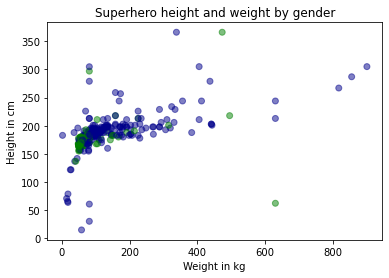

In [56]:
# use hero powers because each hero is only represented once. For this it might have been best to use 
# heroes_df and remove rows with duplicate names. 
# male_heros = hero_powers[hero_powers['Gender'] == 'Male']
# female_heros = hero_powers[hero_powers['Gender'] == 'Female']

# plt.scatter(x=male_heros['Weight'],
#             y=male_heros['Height'],
#             c='DarkBlue', alpha=0.5)

# plt.scatter(x=female_heros['Weight'],
#             y=female_heros['Height'],
#             c='Green', alpha=0.5)


colors = {'Male' : 'DarkBlue', 'Female' : 'Green'}

plt.scatter(x = heroes_df['Weight'],
            y = heroes_df['Height'], 
            c=heroes_df['Gender'].apply(lambda x: colors[x]),
            alpha = 0.5)


plt.title('Superhero height and weight by gender')
plt.ylabel('Height in cm')
plt.xlabel('Weight in kg')
plt.legend()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [57]:
male_heroes_df = hero_powers[hero_powers['Gender'] == 'Male']
female_heroes_df = hero_powers[hero_powers['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[dataframe['Gender'] == gender][column_name])

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


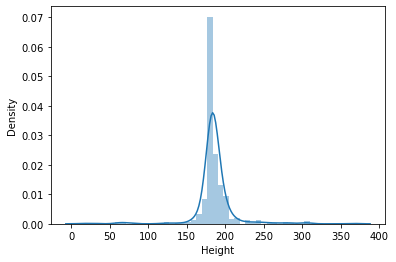

In [58]:
# Male Height
show_distplot(heroes_df, 'Male', 'Height')

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


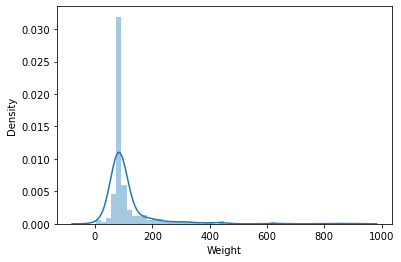

In [59]:
# Male Weight
show_distplot(heroes_df, 'Male', 'Weight')

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


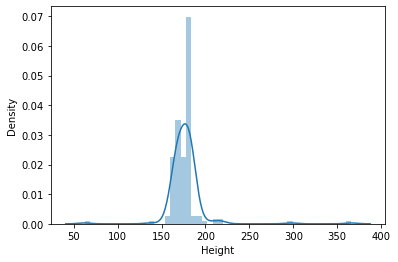

In [60]:
# Female Height
show_distplot(heroes_df, 'Female', 'Height')


# What is density on y axis.

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


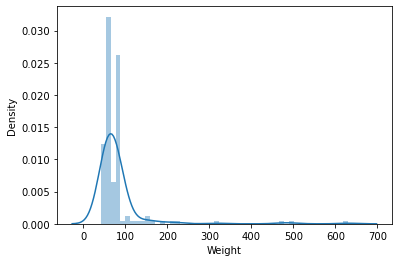

In [61]:
# Female Weight
show_distplot(heroes_df, 'Female', 'Weight')

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

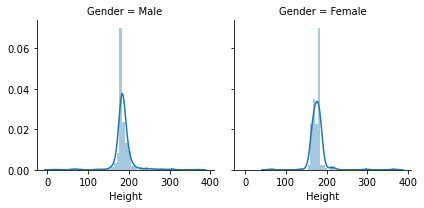

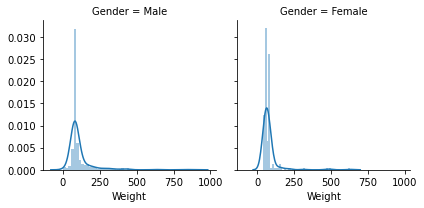

In [62]:
# fig, (ax1, ax2) = plt.subplots()
# ax1.distplot(dataframe[dataframe['Gender'] == 'Male']['Height'])

g = sns.FacetGrid(heroes_df, col="Gender")
g.map(sns.distplot, "Height")

g = sns.FacetGrid(heroes_df, col="Gender")
g.map(sns.distplot, "Weight")


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

    It looks like female super heros have a more narrow distribution of weight, but male super heros have a more narrow distribution of height.
    
    Each of the plots has one very high spike in the middle which could be from filling with median values, but the weight for Femal super heroes has a second spike indicating a median weight.  So many of the female super heroes are the same weight.
    
    Both of these observations fit expectations about idealized figures.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [63]:
powers_df.sum().sort_values(ascending = False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [64]:
powers_df.sum().sort_values(ascending = False).head()

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [65]:
hero_powers[hero_powers['Publisher'] == 'Marvel Comics'].loc[ : ,'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head()

Super Strength    190
Stamina           143
Durability        142
Super Speed       130
Agility           121
dtype: int64

In [66]:
hero_powers[hero_powers['Publisher'] == 'DC Comics'].loc[ : ,'Agility' : 'Omniscient'].sum().sort_values(ascending = False).head()

Super Strength    108
Stamina            90
Flight             84
Super Speed        79
Agility            71
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

    4 of the top 5 super powers are the same between Marvel and DC comics.  The difference is the 3rd is durability for Marvel and Flight for DC.  So the DC world has a higher proporiton of flying super heroes while the Marvel world has hartier heroes.
    
    The top superpowers for Marvel match the top super powers for the full data set.  So flight as a popular feature is a characteristic of DC, more than of super heroes in general (or so it seems looking at only the top 5 results).

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
    I'm going for 'Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?'


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [67]:
# This approach is functional but slow.  There must be a vectorized way to do this.
# create a map of all pairs then count the number of times that pair occurs

# lets try to loop through the pairs and create a power1 and power2 column

power_cols = powers_df.loc[ : , 'Agility' : ].columns
n_power_cols = len(power_cols)

power_pairs = {}

for i in range(n_power_cols):
    power1 = power_cols[i]
    for power2 in power_cols[i + 1 : ]:
#         print(power1, power2)
#         #how dow we find the number of times each power pair occurs?
#         print(hero_powers[hero_powers[power1] & hero_powers[power2]].size)
        power_pairs[(power1, power2)] = hero_powers[hero_powers[power1] & hero_powers[power2]].size
    
power_pairs = pd.DataFrame.from_dict(power_pairs, orient='index', columns=['count'])
power_pairs

,count
"(Agility, Accelerated Healing)",18618
"(Agility, Lantern Power Ring)",870
"(Agility, Dimensional Awareness)",1914
"(Agility, Cold Resistance)",4698
"(Agility, Durability)",21054
...,...
"(Molecular Dissipation, Omnipresent)",0
"(Molecular Dissipation, Omniscient)",0
"(Vision - Cryo, Omnipresent)",0
"(Vision - Cryo, Omniscient)",0


In [68]:
def count_power_pairs(df):
    power_cols = df.loc[ : , 'Agility' : ].columns
    n_power_cols = len(power_cols)

    power_pairs = {}

    for i in range(n_power_cols):
        power1 = power_cols[i]
        for power2 in power_cols[i + 1 : ]:
    #         print(power1, power2)
    #         #how dow we find the number of times each power pair occurs?
    #         print(hero_powers[hero_powers[power1] & hero_powers[power2]].size)
            power_pairs[(power1, power2)] = len(df[df[power1] & df[power2]])

    power_pairs = pd.DataFrame.from_dict(power_pairs, orient='index', columns=['count'])
    power_pairs = power_pairs[power_pairs['count'] > 0]
    
    return power_pairs.sort_values(by='count', ascending = False)

In [69]:
def plot_power_pairs(dfs):
    power_pairs = dfs[0]
    for df in dfs:
        
        plt.barh(y = power_pairs[0 : 20].reset_index()['index'].astype(str), width = power_pairs.iloc[0 : 20])


In [71]:
power_pairs = count_power_pairs(powers_df)
power_pairs['male_count'] = count_power_pairs(male_heroes_df)
power_pairs['female_count'] = count_power_pairs(female_heroes_df)

power_pairs

,count,male_count,female_count
"(Durability, Super Strength)",227,166.0,52.0
"(Super Strength, Stamina)",221,162.0,51.0
"(Super Strength, Super Speed)",219,159.0,54.0
"(Agility, Stamina)",178,127.0,44.0
"(Stamina, Super Speed)",171,134.0,38.0
...,...,...,...
"(Radiation Control, Molecular Manipulation)",1,1.0,NaN
"(Radiation Control, Enhanced Sight)",1,1.0,NaN
"(Radiation Control, Natural Armor)",1,1.0,NaN
"(Energy Beams, Elemental Transmogrification)",1,1.0,NaN


Text(0.5, 1.0, 'Power Pairs sorted by highest count')

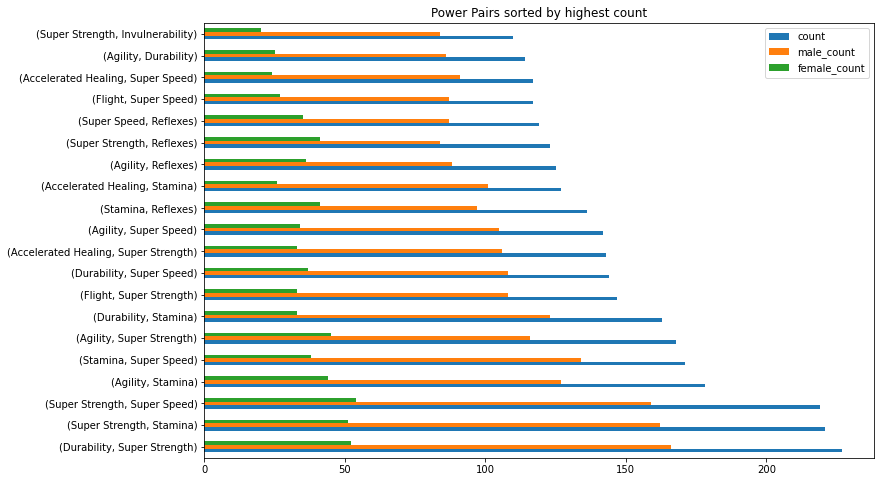

In [72]:
#plot_power_pairs(power_pairs)
power_pairs.iloc[ : 20].fillna(0).plot(kind='barh', figsize=(12,8))
plt.title('Power Pairs sorted by highest count')

Text(0.5, 1.0, 'Power Pairs sorted by highest count for Male Super Heroes')

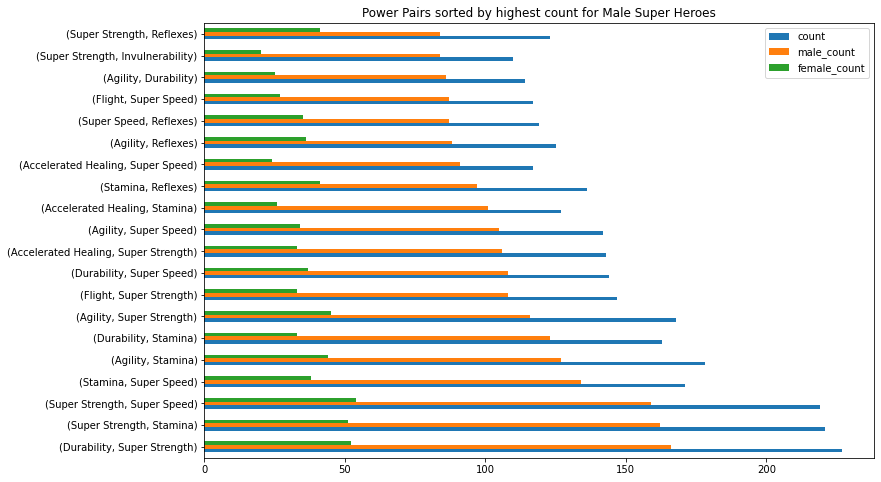

In [73]:
power_pairs.sort_values('male_count', ascending = False).iloc[ : 20].fillna(0).plot(kind='barh', figsize=(12,8))
plt.title('Power Pairs sorted by highest count for Male Super Heroes')

Text(0.5, 1.0, 'Power Pairs sorted by highest count for Female Super Heroes')

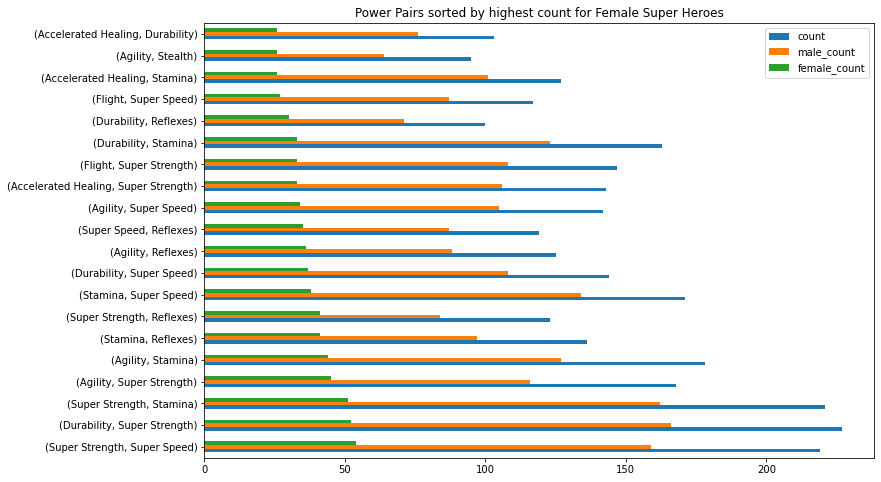

In [74]:
power_pairs.sort_values('female_count', ascending = False).iloc[ : 20].fillna(0).plot(kind='barh', figsize=(12,8))
plt.title('Power Pairs sorted by highest count for Female Super Heroes')

In [75]:
print('Top 5 Power Pairs:', power_pairs.sort_values(by='count')[:5].index)
print('Top 5 Power Pairs for Male:', power_pairs.sort_values(by='male_count')[:5].index)
print('Top 5 Power Pairs for Female:', power_pairs.sort_values(by='female_count')[:5].index)


Top 5 Power Pairs: Index([('Animal Oriented Powers', 'Precognition'),
                  ('Invisibility', 'Sub-Mariner'),
         ('Magic Resistance', 'Vision - Thermal'),
            ('Magic Resistance', 'Vision - Heat'),
           ('Magic Resistance', 'Vision - Night')],
      dtype='object')
Top 5 Power Pairs for Male: Index([        ('Fire Control', 'Resurrection'),
                ('Natural Armor', 'Levitation'),
       ('Intangibility', 'Vision - Telescopic'),
              ('Intangibility', 'Power Cosmic'),
       ('Natural Armor', 'Energy Manipulation')],
      dtype='object')
Top 5 Power Pairs for Female: Index([          ('Enhanced Senses', 'Regeneration'),
                     ('Cryokinesis', 'Force Fields'),
                    ('Camouflage', 'Enhanced Smell'),
                ('Weapons Master', 'Enhanced Touch'),
       ('Technopath/Cyberpath', 'Vision - Infrared')],
      dtype='object')


    Perhaps another day we need to consider whether Enhanced Smell is a form of Enhanced Senses and so they should either all be combined or Enhanced Senses deleted.
    
    There is no overlap between any of the top 5 powers which is interesting.  Neither Male nor Female powers dominate the count even though there are many more male superheroes them female.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data

    Just out of curiosity I want to see if melting the DataFrame and agregating the values would be faster than the method I used above.

In [76]:
hero_powers.reset_index().head()

,index,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False


    I think this probably is faster but I can't quite fit the pieces together yet.  I am going to move on to another topic.
   

In [77]:
def count_power_pairs2(df):
    power_cols = df.loc[ : , 'Agility' : ].columns
    n_power_cols = len(power_cols)
    power_pairs = pd.DataFrame(columns=['index', 'power1', 'power2'])
    
    for i in range(n_power_cols-1):
        power1 = power_cols[i]
        tmp_powers = df.reset_index().melt(id_vars = ['index'] + list(power_cols[i + 1 : ]), value_vars = power1, var_name = 'power1')
        #tmp_powers = tmp_powers[tmp_powers['value']]
        tmp_powers = tmp_powers.reset_index().melt(id_vars = ['index', 'power1', 'value'], value_vars = power_cols[i + 1 : ], var_name = 'power2', value_name='value2')
        tmp_powers = tmp_powers[tmp_powers['value'] & tmp_powers['value2']].drop('value2', axis=1)
        power_pairs = power_pairs.append(tmp_powers)

    return power_pairs.groupby(['power1', 'power2']).count().sort_values(by = 'index', ascending = False)['index']

In [78]:
%%timeit
count_power_pairs2(hero_powers)

5.49 s ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit
count_power_pairs(hero_powers)

3.82 s ± 7.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
count_power_pairs2(hero_powers).head()

power1          power2        
Durability      Super Strength    236
Super Strength  Stamina           230
                Super Speed       228
Agility         Stamina           186
Stamina         Super Speed       180
Name: index, dtype: int64

In [81]:
count_power_pairs(hero_powers).head()

,count
"(Durability, Super Strength)",236
"(Super Strength, Stamina)",230
"(Super Strength, Super Speed)",228
"(Agility, Stamina)",186
"(Stamina, Super Speed)",180


# Womp womp.  The first method was faster.